In [1]:
from fastai.vision import *

In [2]:
classes = ['revolver', 'glock', 'desert_eagle'] # Folder and class names are same
path = Path('data/guns')

### View Data

In [3]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, 
                                ds_tfms=get_transforms(), size=224, 
                                num_workers=4).normalize(imagenet_stats)

In [4]:
data.classes

['desert_eagle', 'glock', 'revolver']

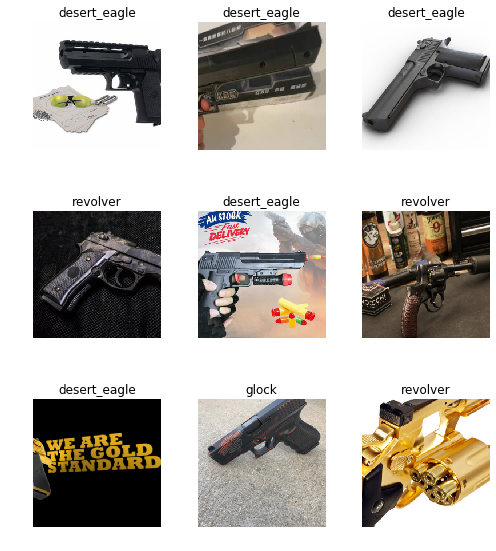

In [5]:
data.show_batch(rows=3, figsize=(7,8))

In [6]:
len(data.train_ds), len(data.valid_ds)

(732, 182)

### Train Model

In [7]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [8]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


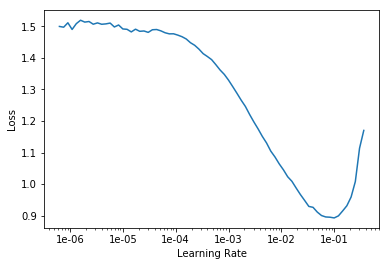

In [9]:
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate
1,1.292341,0.761229,0.307692
2,0.913475,0.420785,0.175824
3,0.707450,0.380491,0.142857
4,0.571987,0.360608,0.120879
5,0.488810,0.326656,0.104396
6,0.421470,0.323357,0.131868
7,0.371071,0.309251,0.109890
8,0.335977,0.299397,0.115385
9,0.303211,0.293250,0.126374
10,0.276200,0.292540,0.109890


In [11]:
learn.save('stage-1')

In [12]:
learn.unfreeze()

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


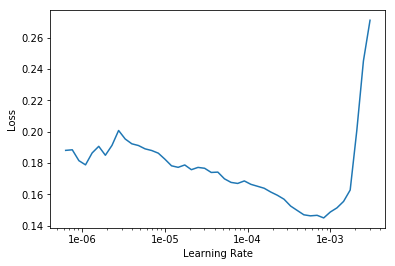

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(5, max_lr=slice(1e-4, (3e-3)/5))

epoch,train_loss,valid_loss,error_rate
1,0.216478,0.294174,0.115385
2,0.193623,0.381674,0.104396
3,0.160810,0.436073,0.104396
4,0.132309,0.198304,0.071429
5,0.108559,0.194058,0.060440


In [16]:
learn.save('stage-2')

### Interpretation

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

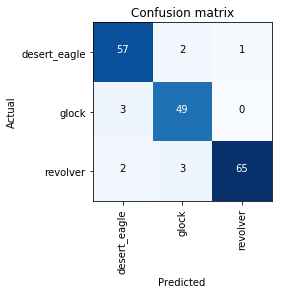

In [19]:
interp.plot_confusion_matrix()

## Clean Dataset

In [20]:
from fastai.widgets import *

In [21]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [22]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [23]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)

Getting activations...


Computing similarities...


In [24]:
ImageCleaner(ds, idxs,path,duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

### Export to be used in production

In [25]:
learn.export()